In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("RRCA_baseflow.csv")
display(df)
df['Date'] = df['Date'] - 693963
df['Date_YMD'] = pd.to_datetime(df['Date'], origin='1900-01-01', unit='D')

# df.to_csv('RRCA_baseflow_YMD.csv')


,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
0,710732,144,1086190,14476800,0.59,18.99,0.0,0.145161
1,710763,144,1086190,14476800,0.97,29.63,0.0,0.445161
2,710791,144,1086190,14476800,1.34,29.63,0.0,1.332203
3,710822,144,1086190,14476800,1.79,29.63,0.0,2.932203
4,710852,144,1086190,14476800,8.23,29.63,0.0,3.728689
...,...,...,...,...,...,...,...,...
15586,721810,98,721870,14387040,0.00,0.00,0.0,0.298500
15587,721841,98,721870,14387040,0.00,0.00,0.0,0.211475
15588,721871,98,721870,14387040,0.00,0.00,0.0,0.122951
15589,721902,98,721870,14387040,0.00,0.00,0.0,0.120000


In [3]:
print(df.isnull().sum())

Date                  0
Segment_id            0
x                     0
y                     0
Evapotranspiration    0
Precipitation         0
Irrigation_pumping    0
Observed              0
Date_YMD              0
dtype: int64


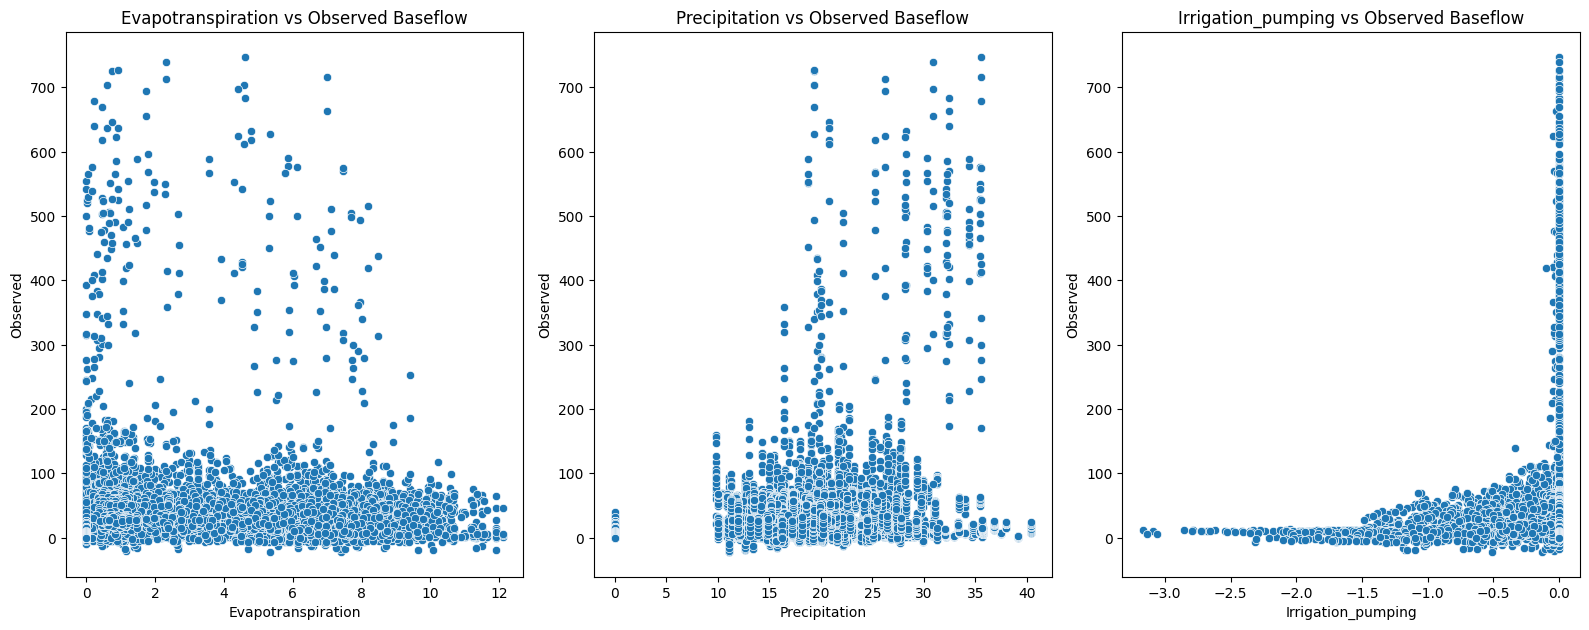

In [4]:
plt.figure(figsize=(16, 12))

predictors = ['Evapotranspiration', 'Precipitation', 'Irrigation_pumping']

for i, col in enumerate(predictors, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x=col, y='Observed')
    plt.title(f'{col} vs Observed Baseflow')

plt.tight_layout()
plt.show()

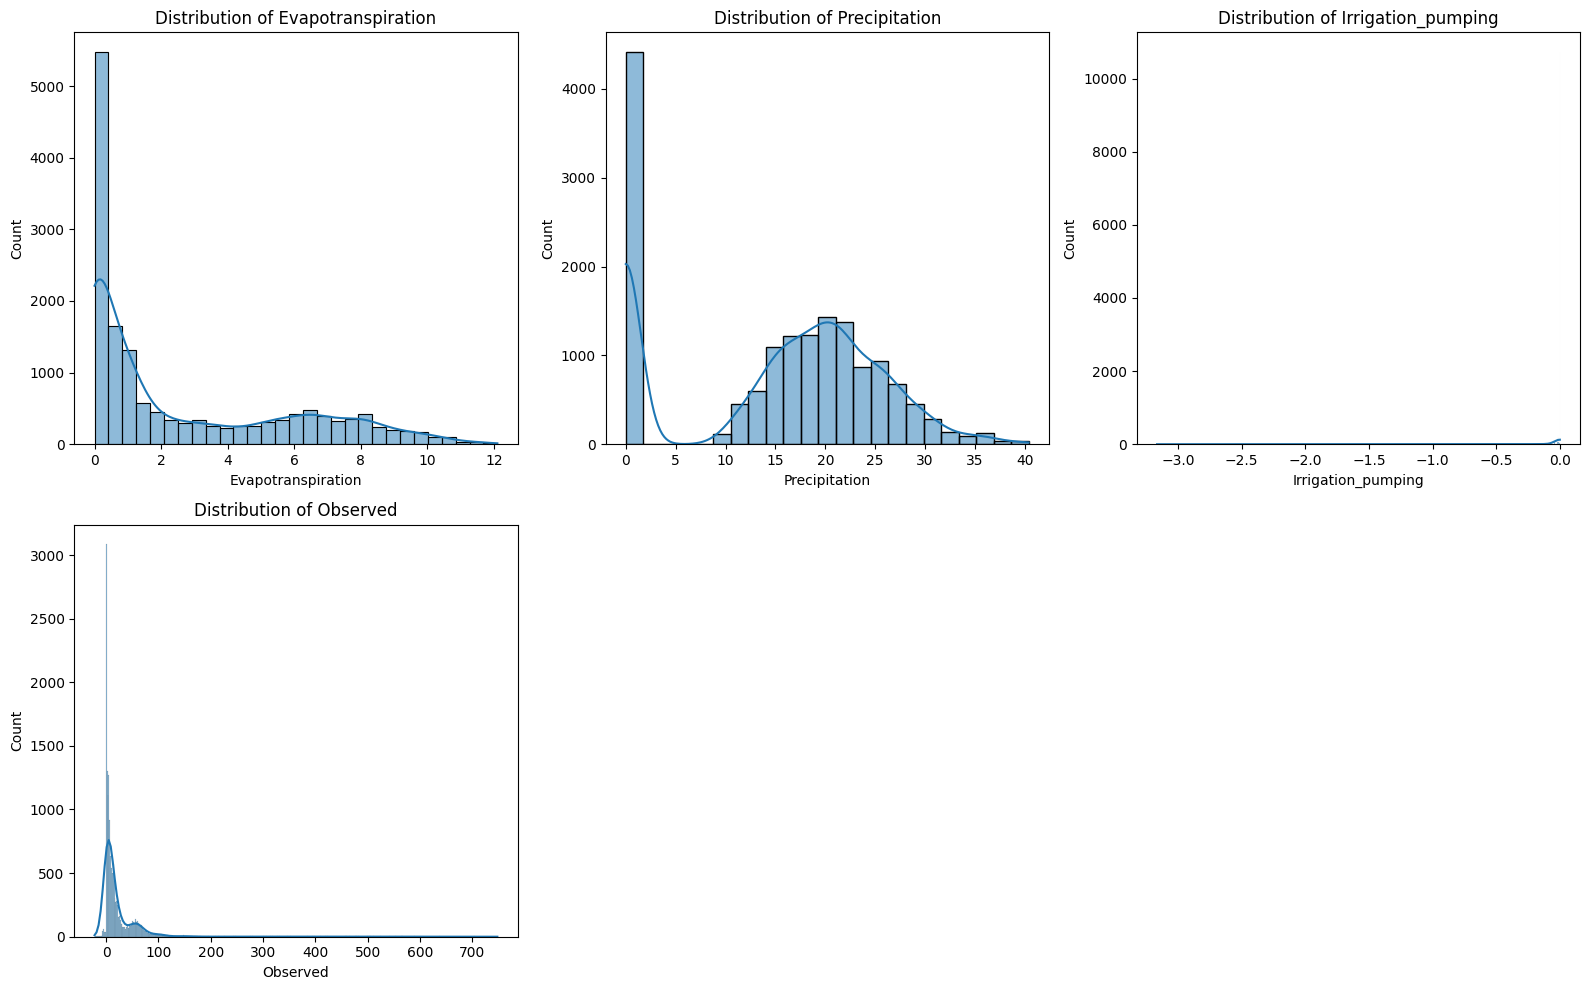

In [5]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(predictors + ['Observed'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Data for Segment id 144:


,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,Date_YMD
0,16769,144,1086190,14476800,0.59,18.99,0.0,0.145161,1945-11-30
1,16800,144,1086190,14476800,0.97,29.63,0.0,0.445161,1945-12-31
2,16828,144,1086190,14476800,1.34,29.63,0.0,1.332203,1946-01-28
3,16859,144,1086190,14476800,1.79,29.63,0.0,2.932203,1946-02-28
4,16889,144,1086190,14476800,8.23,29.63,0.0,3.728689,1946-03-30


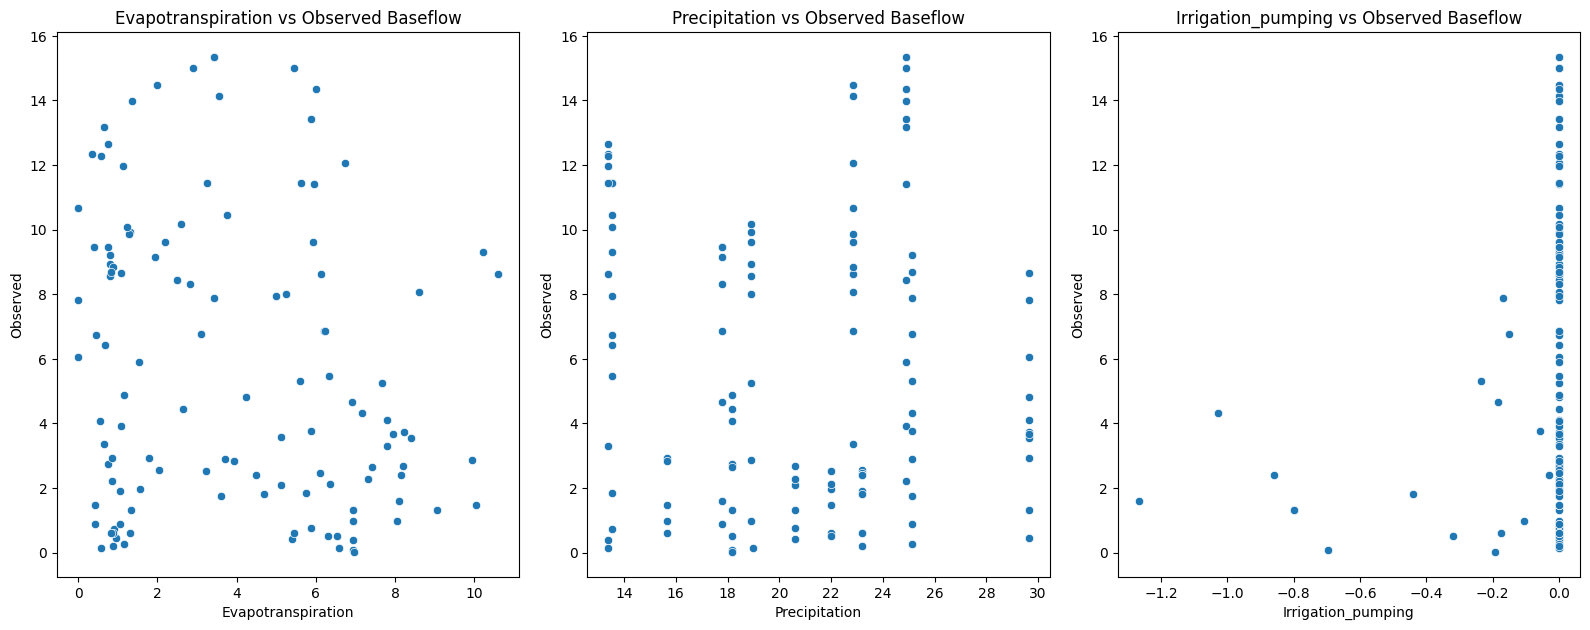

In [14]:
specific_segment_id = 144 
df_specific_segment = df[df['Segment_id'] == specific_segment_id]
print(f"Data for Segment id {specific_segment_id}:")
display(df_specific_segment.head())
# df_specific_segment.to_csv(f'{specific_segment_id}segment.csv')
plt.figure(figsize=(16, 12))

predictors = ['Evapotranspiration', 'Precipitation', 'Irrigation_pumping']

for i, col in enumerate(predictors, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df_specific_segment, x=col, y='Observed')
    plt.title(f'{col} vs Observed Baseflow')

plt.tight_layout()
plt.show()

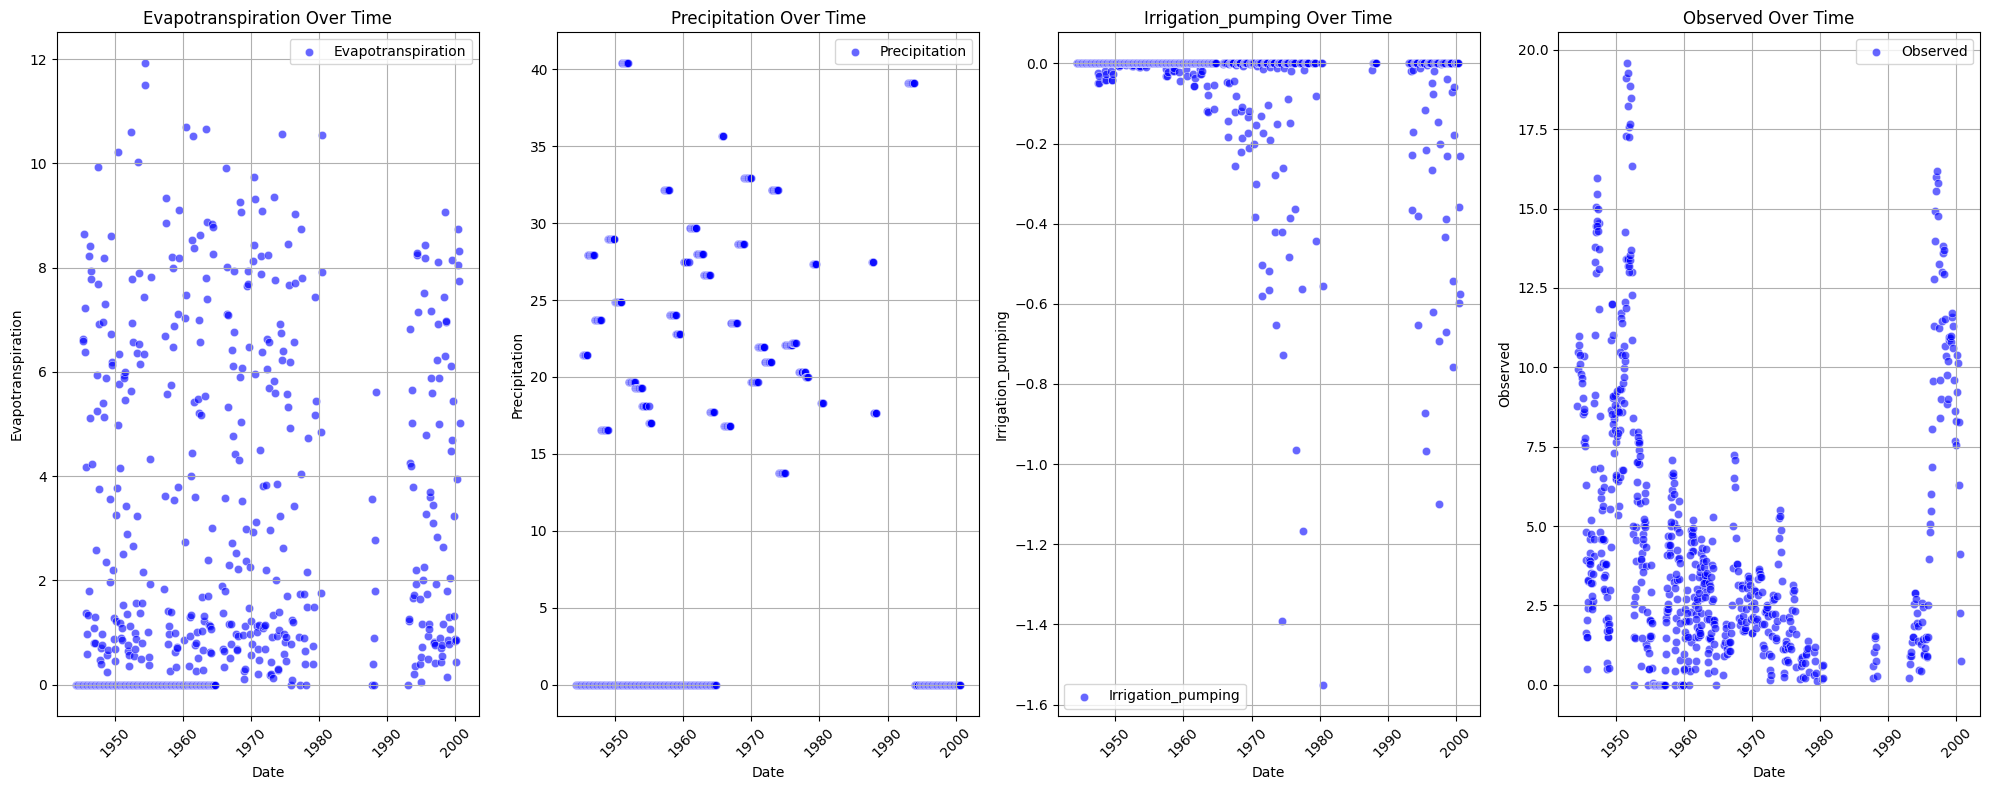

In [33]:
plt.figure(figsize=(20, 8))
predictors = ['Evapotranspiration', 'Precipitation', 'Irrigation_pumping','Observed']

for i, col in enumerate(predictors, 1):
    plt.subplot(1, 4, i)
    sns.scatterplot(data=df_specific_segment, x='Date_YMD', y=col, label=col, color='blue', alpha=0.6)
    plt.title(f'{col} Over Time')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()

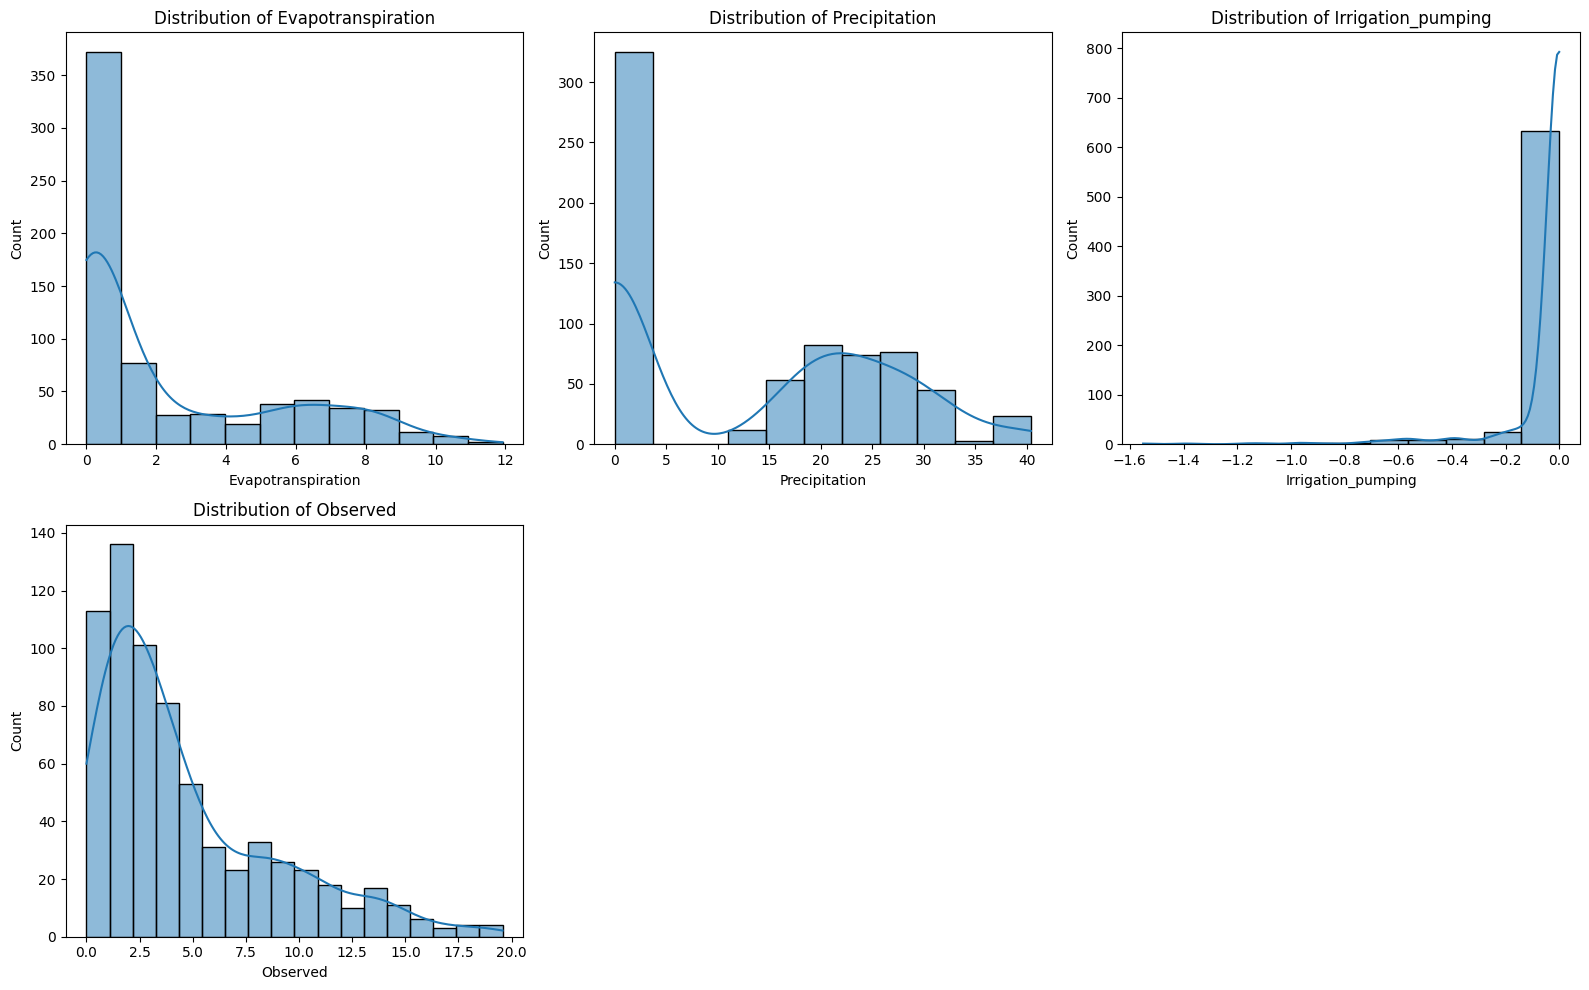

In [39]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(predictors, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_specific_segment[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Data for Segment id 171:


,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,Date_YMD
297,16555,171,1508590,14524320,6.63,21.41,0.0,7.645161,1945-04-30
298,16585,171,1508590,14524320,6.59,21.41,0.0,10.363934,1945-05-30
299,16616,171,1508590,14524320,8.65,21.41,0.0,7.763934,1945-06-30
300,16647,171,1508590,14524320,7.23,21.41,0.0,4.826230,1945-07-31
301,16677,171,1508590,14524320,6.38,21.41,0.0,1.626229,1945-08-30


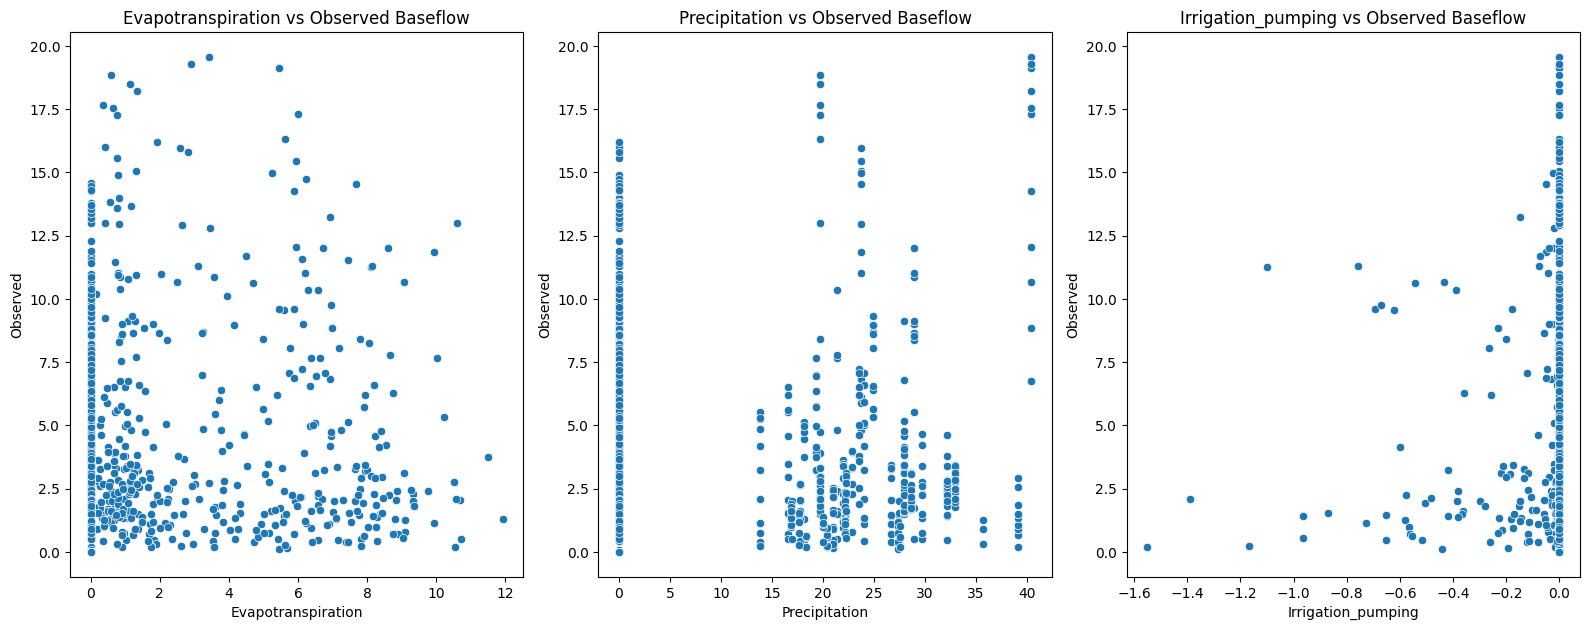

In [30]:
specific_segment_id = 171 
df_specific_segment = df[df['Segment_id'] == specific_segment_id]
print(f"Data for Segment id {specific_segment_id}:")
display(df_specific_segment.head())
# df_specific_segment.to_csv(f'{specific_segment_id}segment.csv')
plt.figure(figsize=(16, 12))

predictors = ['Evapotranspiration', 'Precipitation', 'Irrigation_pumping']

for i, col in enumerate(predictors, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df_specific_segment, x=col, y='Observed')
    plt.title(f'{col} vs Observed Baseflow')

plt.tight_layout()
plt.show()

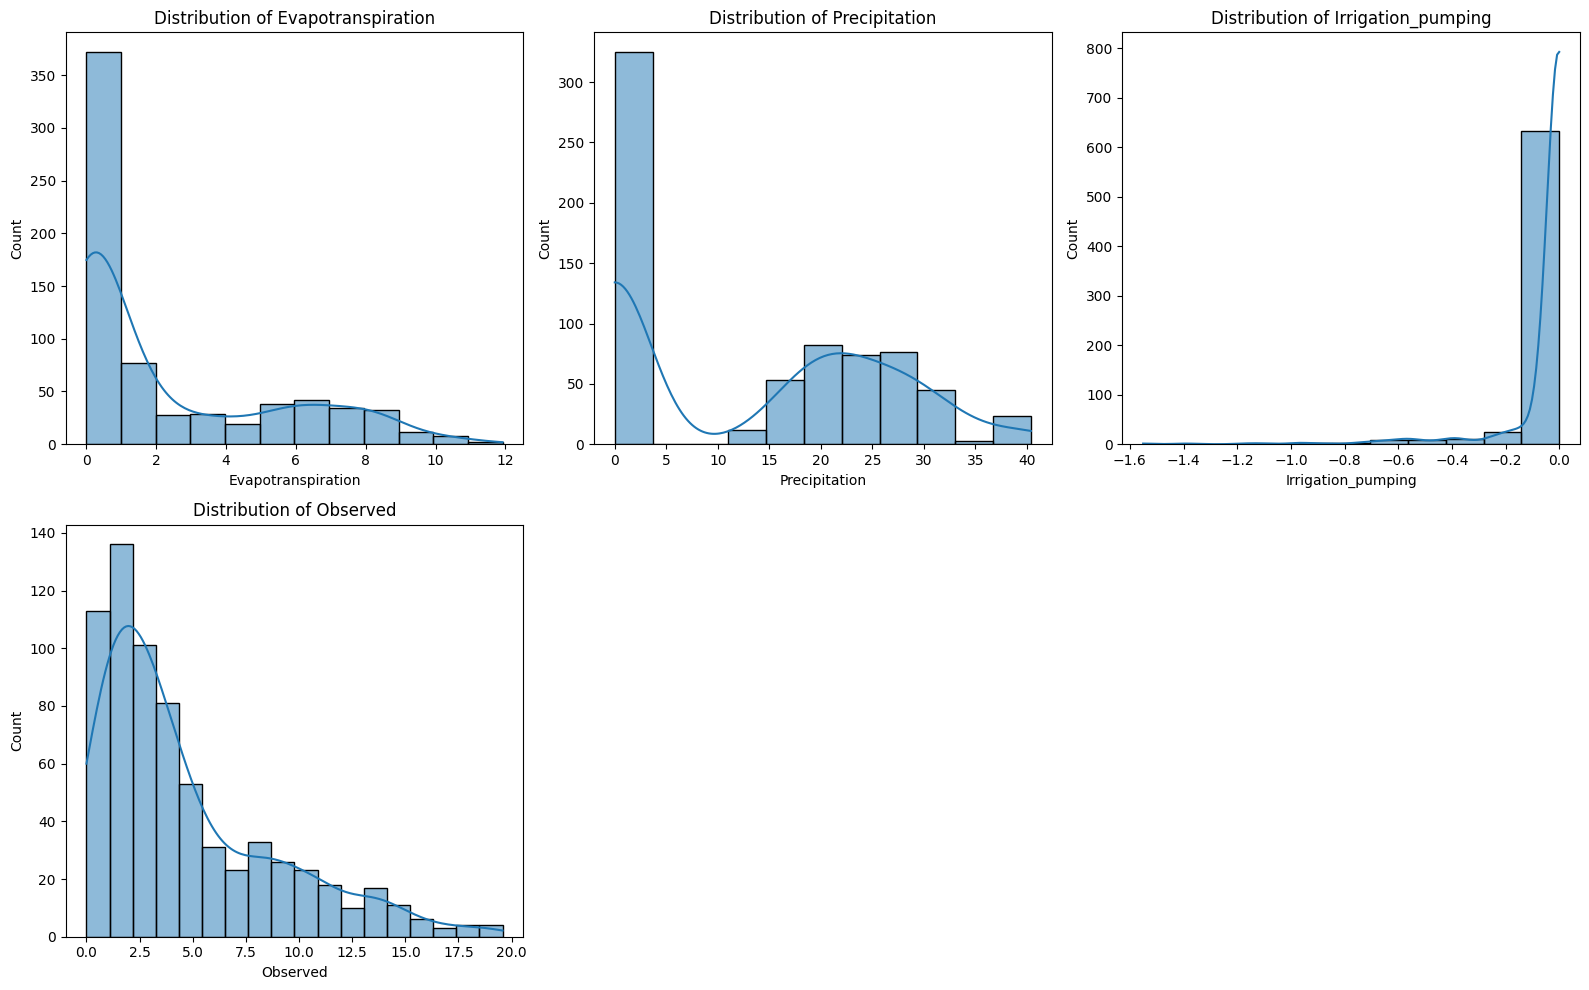

In [38]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(predictors, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_specific_segment[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

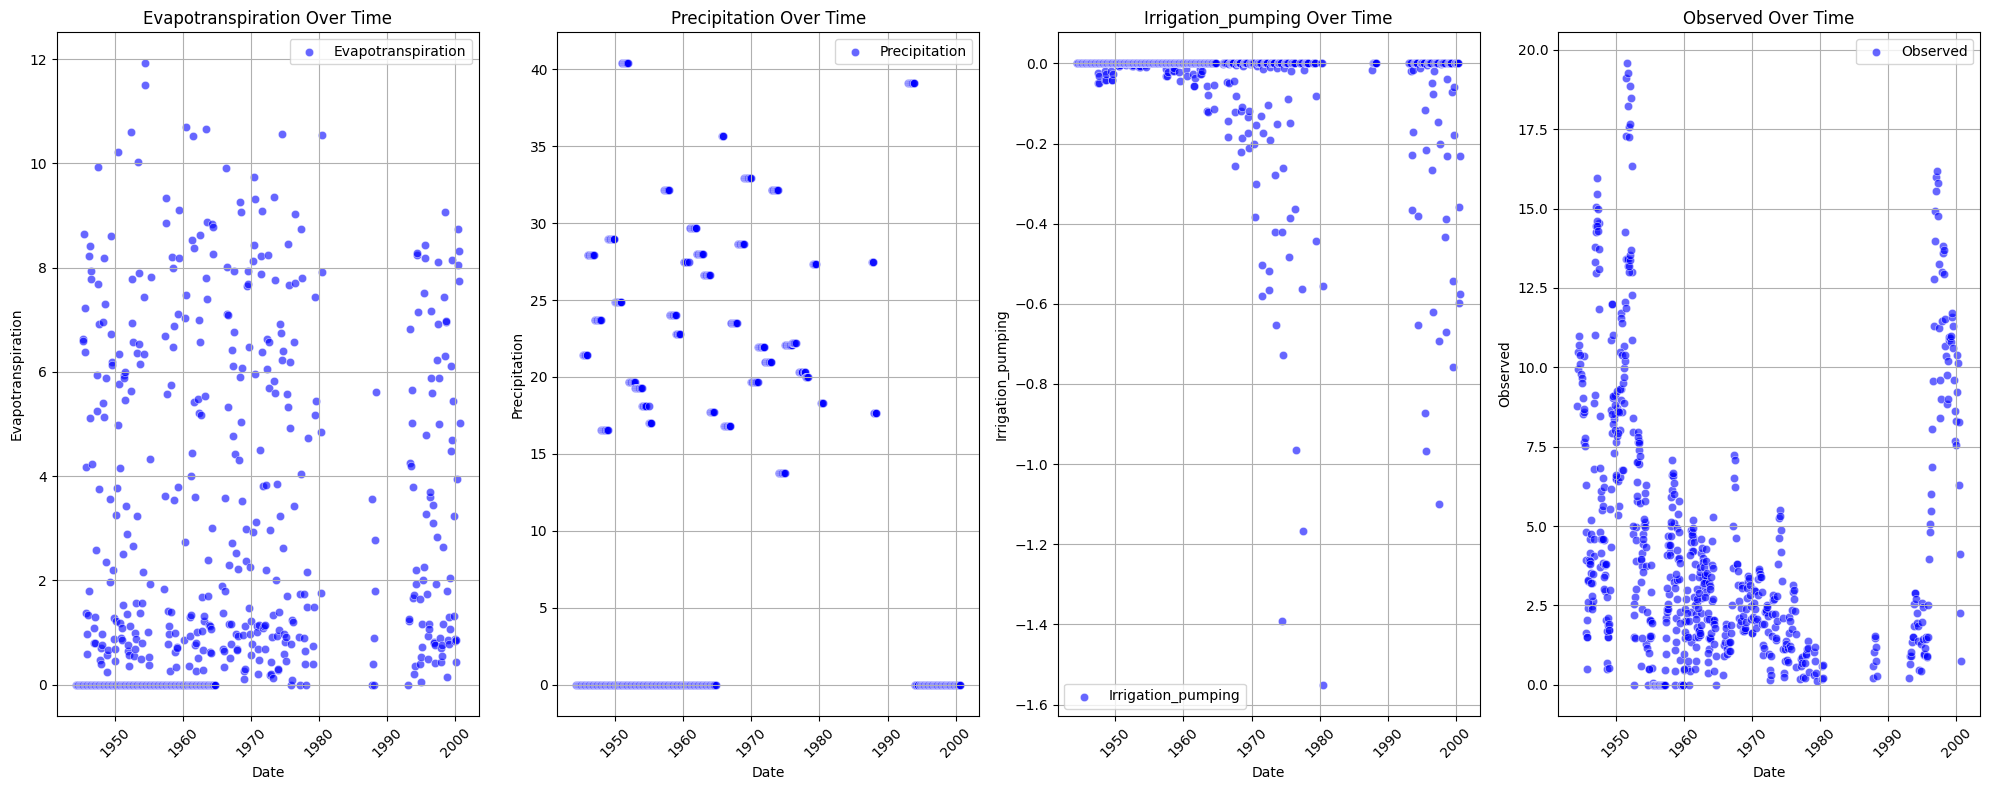

In [35]:
plt.figure(figsize=(20, 8))
predictors = ['Evapotranspiration', 'Precipitation', 'Irrigation_pumping','Observed']

for i, col in enumerate(predictors, 1):
    plt.subplot(1, 4, i)
    sns.scatterplot(data=df_specific_segment, x='Date_YMD', y=col, label=col, color='blue', alpha=0.6)
    plt.title(f'{col} Over Time')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()